In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 100% !important; }</style>"))
pd.set_option("display.max_columns", 45)

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df1 = pd.DataFrame({'column': column, 'VIF': variance_inflation_factor(model.exog, i)}
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept').sort_values(by = 'VIF',ascending=False)

In [30]:
df = pd.read_csv('Data/statiz_origin_wr_wr.csv', encoding='euc-kr')
df

Unnamed: 0   ID   이름          생일  팀    시즌 포지션  나이    G   타석   타수   득점  \
0             0    0  테임즈  1986-11-10  N  2015  1B  30  142  595  472  130   
1             1    1  이대호  1982-06-21  롯  2010  3B  29  127  552  478   99   
2             2    2  강정호  1987-04-05  넥  2012  SS  26  124  519  436   77   
3             3    2  강정호  1987-04-05  넥  2014  SS  28  117  501  418  103   
4             4    3  박석민  1985-06-22  삼  2012  3B  28  127  549  443   79   
..          ...  ...  ...         ... ..   ...  ..  ..  ...  ...  ...  ...   
741         955   83  김주형  1985-12-15  K  2011  1B  27   88  300  271   23   
742         956  167  정주현  1990-10-13  L  2016  2B  27   99  257  225   30   
743         957  492  오윤석  1992-02-24  롯  2019  1B  28   76  228  198   21   
744         958   72  윤석민  1985-09-04  K  2019  1B  35   63  178  169    4   
745         959  548  김대우  1984-07-26  롯  2015  1B  32   39  100   92    9   

      안타  2타  3타  홈런   루타   타점  도루  도실   볼넷  사구  고4   삼진  병살  희타  희비     타율  \
0    180  42   5  47  373  140  40   8  103  13  11   91   7   0   7  0.381   
1    174  13   0  44  319  133   0   2   61  10   6   77  15   0   3  0.364   
2    137  32   0  25  244   82  21   5   71   6   8   78  16   1   5  0.314   
3    149  36   2  40  309  117   3   3   68  13   2  106   8   0   2  0.356   
4    138  19   3  23  232   91   2   3   72  27   5   83   8   2   5  0.312   
..   ...  ..  ..  ..  ...  ...  ..  ..  ...  ..  ..  ...  ..  ..  ..    ...   
741   54  14   0   9   95   40   1   0   17   4   0   71   6   7   1  0.199   
742   50  12   1   1   67   22   5   5   28   0   0   66   1   2   2  0.222   
743   44   2   0   1   49   21   0   0   20   2   1   43   4   4   4  0.222   
744   39   4   0   2   49   17   0   0    7   0   0   24   4   0   2  0.231   
745   16   1   1   3   28    9   3   1    5   1   0   39   2   2   0  0.174   

        출루     장타    OPS   wOBA   wRC+   WAR+  
0    0.498  0.790  1.288  0.530  222.3  10.71  
1    0.444  0.667  1.111  0.482  192.4   8.82  
2    0.413  0.560  0.973  0.438  179.8   8.23  
3    0.459  0.739  1.198  0.500  185.6   8.05  
4    0.433  0.524  0.957  0.438  179.9   7.89  
..     ...    ...    ...    ...    ...    ...  
741  0.256  0.351  0.607  0.275   58.9  -0.66  
742  0.306  0.298  0.604  0.287   52.5  -0.67  
743  0.295  0.247  0.542  0.258   49.6  -0.67  
744  0.258  0.290  0.548  0.256   47.6  -0.67  
745  0.225  0.304  0.529  0.233   23.6  -0.68  

[746 rows x 34 columns]

In [4]:
df['팀'].unique()

array(['N', '롯', '넥', '삼', '두', 'S', '키', '한', 'K', 'L', 'kt', 'L넥', '넥N',
       'SL', 'NK', 'LS', '한K', 'KS', 'KK', '한두'], dtype=object)

### 운 지표 추가
사람이 하는 스포츠인 야구는 운의 요소가 많이 작용한다. 결과 예측의 정확도를 높이기 위해 운의 요소를 고려할 필요가 있으며, 이는 각 지표들이 전년도와 예측하려는 년도 사이에 어느 정도의 상관관계가 있는지 알아봐야 한다. 
상관 계수를 구해본 결과 홈런, 볼넷, 삼진아웃은 상관 계수가 높으며 직전 연도의 데이터와 관련성이 높은 것으로 나타났다. 반대로 2루타, 3루타는 상관 계수가 낮으며 직전 연도의 데이터와 관련성이 낮은 것으로 나타났다
즉 운의 요소를 많이 포함하고 있다고 볼 수 있다. 이러한 운의 요소를 수치화할 수 있는 지표를 추가한다.

In [76]:
df['twoBLUCK'] = df['2타']/(df['타수'] - df['홈런'] - df['삼진'])

In [74]:
df['threeBLUCK'] = df['3타']/(df['타수'] - df['홈런'] - df['삼진'])

In [77]:
# 순장타율
df['ISO'] = df['장타'] - df['타율']

In [78]:
# 볼넷/삼진비율
df['BBK'] = round(df['볼넷']/df['삼진'],4)

In [72]:
df.rename(columns={"wRC+": "wRC"}, inplace=True)
df.rename(columns={"WAR+": "WAR"}, inplace=True)

df['count'] = None
df_n = df[df['이름'] == x].sort_values(ascending=True, by=['시즌'])
for x in set(df['이름']):
    i = 1
    for z in df_n['시즌']:
        for y in range(2010, 2020):
            if z == y:
                print(y, z, x)
                #df_n['count'][df_n['시즌']==y] = i
                #i += 1
                #print(y, z, x, i)

In [86]:
# 변수 선택?
model = sm.OLS.from_formula(
    "OPS ~  시즌 + 포지션 + 나이 + G + 타석 + 득점 + 안타 + 루타 + 타점 + 도루 + 도실 + 볼넷 + 사구 + 고4 + 병살 + 희타 + 희비 + 타율 + 출루 + wOBA + wRC + WAR + twoBLUCK + threeBLUCK + ISO", data=df)
result = model.fit()
sm.stats.anova_lm(result, typ=2)

sum_sq     df             F    PR(>F)
포지션         1.225543e-06    9.0  7.359513e-01  0.676062
시즌          1.063693e-06    1.0  5.748825e+00  0.016764
나이          2.506416e-07    1.0  1.354615e+00  0.244875
G           7.559582e-08    1.0  4.085646e-01  0.522911
타석          8.687161e-08    1.0  4.695056e-01  0.493444
득점          1.877913e-07    1.0  1.014936e+00  0.314076
안타          1.859863e-07    1.0  1.005180e+00  0.316411
루타          3.809252e-09    1.0  2.058745e-02  0.885950
타점          1.680895e-07    1.0  9.084550e-01  0.340858
도루          1.305352e-07    1.0  7.054897e-01  0.401236
도실          2.039376e-08    1.0  1.102200e-01  0.739995
볼넷          1.791030e-08    1.0  9.679788e-02  0.755801
사구          5.074537e-08    1.0  2.742580e-01  0.600658
고4          9.346735e-10    1.0  5.051529e-03  0.943359
병살          2.051427e-08    1.0  1.108712e-01  0.739255
희타          1.280717e-08    1.0  6.921752e-02  0.792558
희비          1.721145e-07    1.0  9.302087e-01  0.335146
타율          6.004677e-01    1.0  3.245283e+06  0.000000
출루          9.380283e-02    1.0  5.069660e+05  0.000000
wOBA        1.218059e-07    1.0  6.583112e-01  0.417436
wRC         8.206992e-08    1.0  4.435544e-01  0.505634
WAR         2.121888e-07    1.0  1.146794e+00  0.284595
twoBLUCK    3.579548e-07    1.0  1.934600e+00  0.164704
threeBLUCK  1.655010e-07    1.0  8.944653e-01  0.344601
ISO         4.363269e-01    1.0  2.358169e+06  0.000000
Residual    1.278542e-04  691.0           NaN       NaN

In [80]:
sns.pairplot(df[['OPS', '팀', 'wOBA', 'wRC', 'WAR', 'twoBLUCK', 'threeBLUCK', 'ISO']])
plt.show()

In [82]:
# 4이상 : 팀, 포지션, 시즌, 나이, 타점, 도루, 도실, 사구, 희타, 출루, threeBLUCK
model = sm.OLS.from_formula(
    'OPS~ 포지션 + C(시즌) + 나이 + 타점 + 도루 + 도실 + 사구 + 희타 + threeBLUCK + ISO', data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    OPS   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     26.55
Date:                Mon, 30 Mar 2020   Prob (F-statistic):           1.20e-86
Time:                        16:30:47   Log-Likelihood:                 44.076
No. Observations:                 725   AIC:                            -34.15
Df Residuals:                     698   BIC:                             89.67
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1988      0.081      2.450

### 나이
그래서 20세부터 35세까지 10년 이상 뛴 선수로 대상을 좁혀 나이별 성적을 파악해보았다. 타자의 경우는 전체 선수를 대상으로 했을 때와 마찬가지로 27세 때의 기록이 가장 좋아 비슷한 결과를 보였다. 그러나 앞선 전체 기록과 비교하면 전성기 전후로 상하향 곡선이 일정하다. OPS를 기준으로 보면 22세부터 31세까지 차이가 크지 않다가 32세부터 급하락한다. 이런 경향은 장타율이 가장 심하며 출루율은 그나마 편차가 크지 않다. 나이가 들수록 힘이 떨어져 장타력은 떨어지지만 선구안이 좋아졌다고 봐도 무방할 듯하다.
https://news.joins.com/article/3884660

In [84]:
#result['나이'] = result.apply(lambda x: x['시즌'] - int(x['생일'][:4]) + 1, axis=1)
#df['나이1'] = df.apply(lambda x: 1 if x['나이'] >= 32 else 0, axis=1)

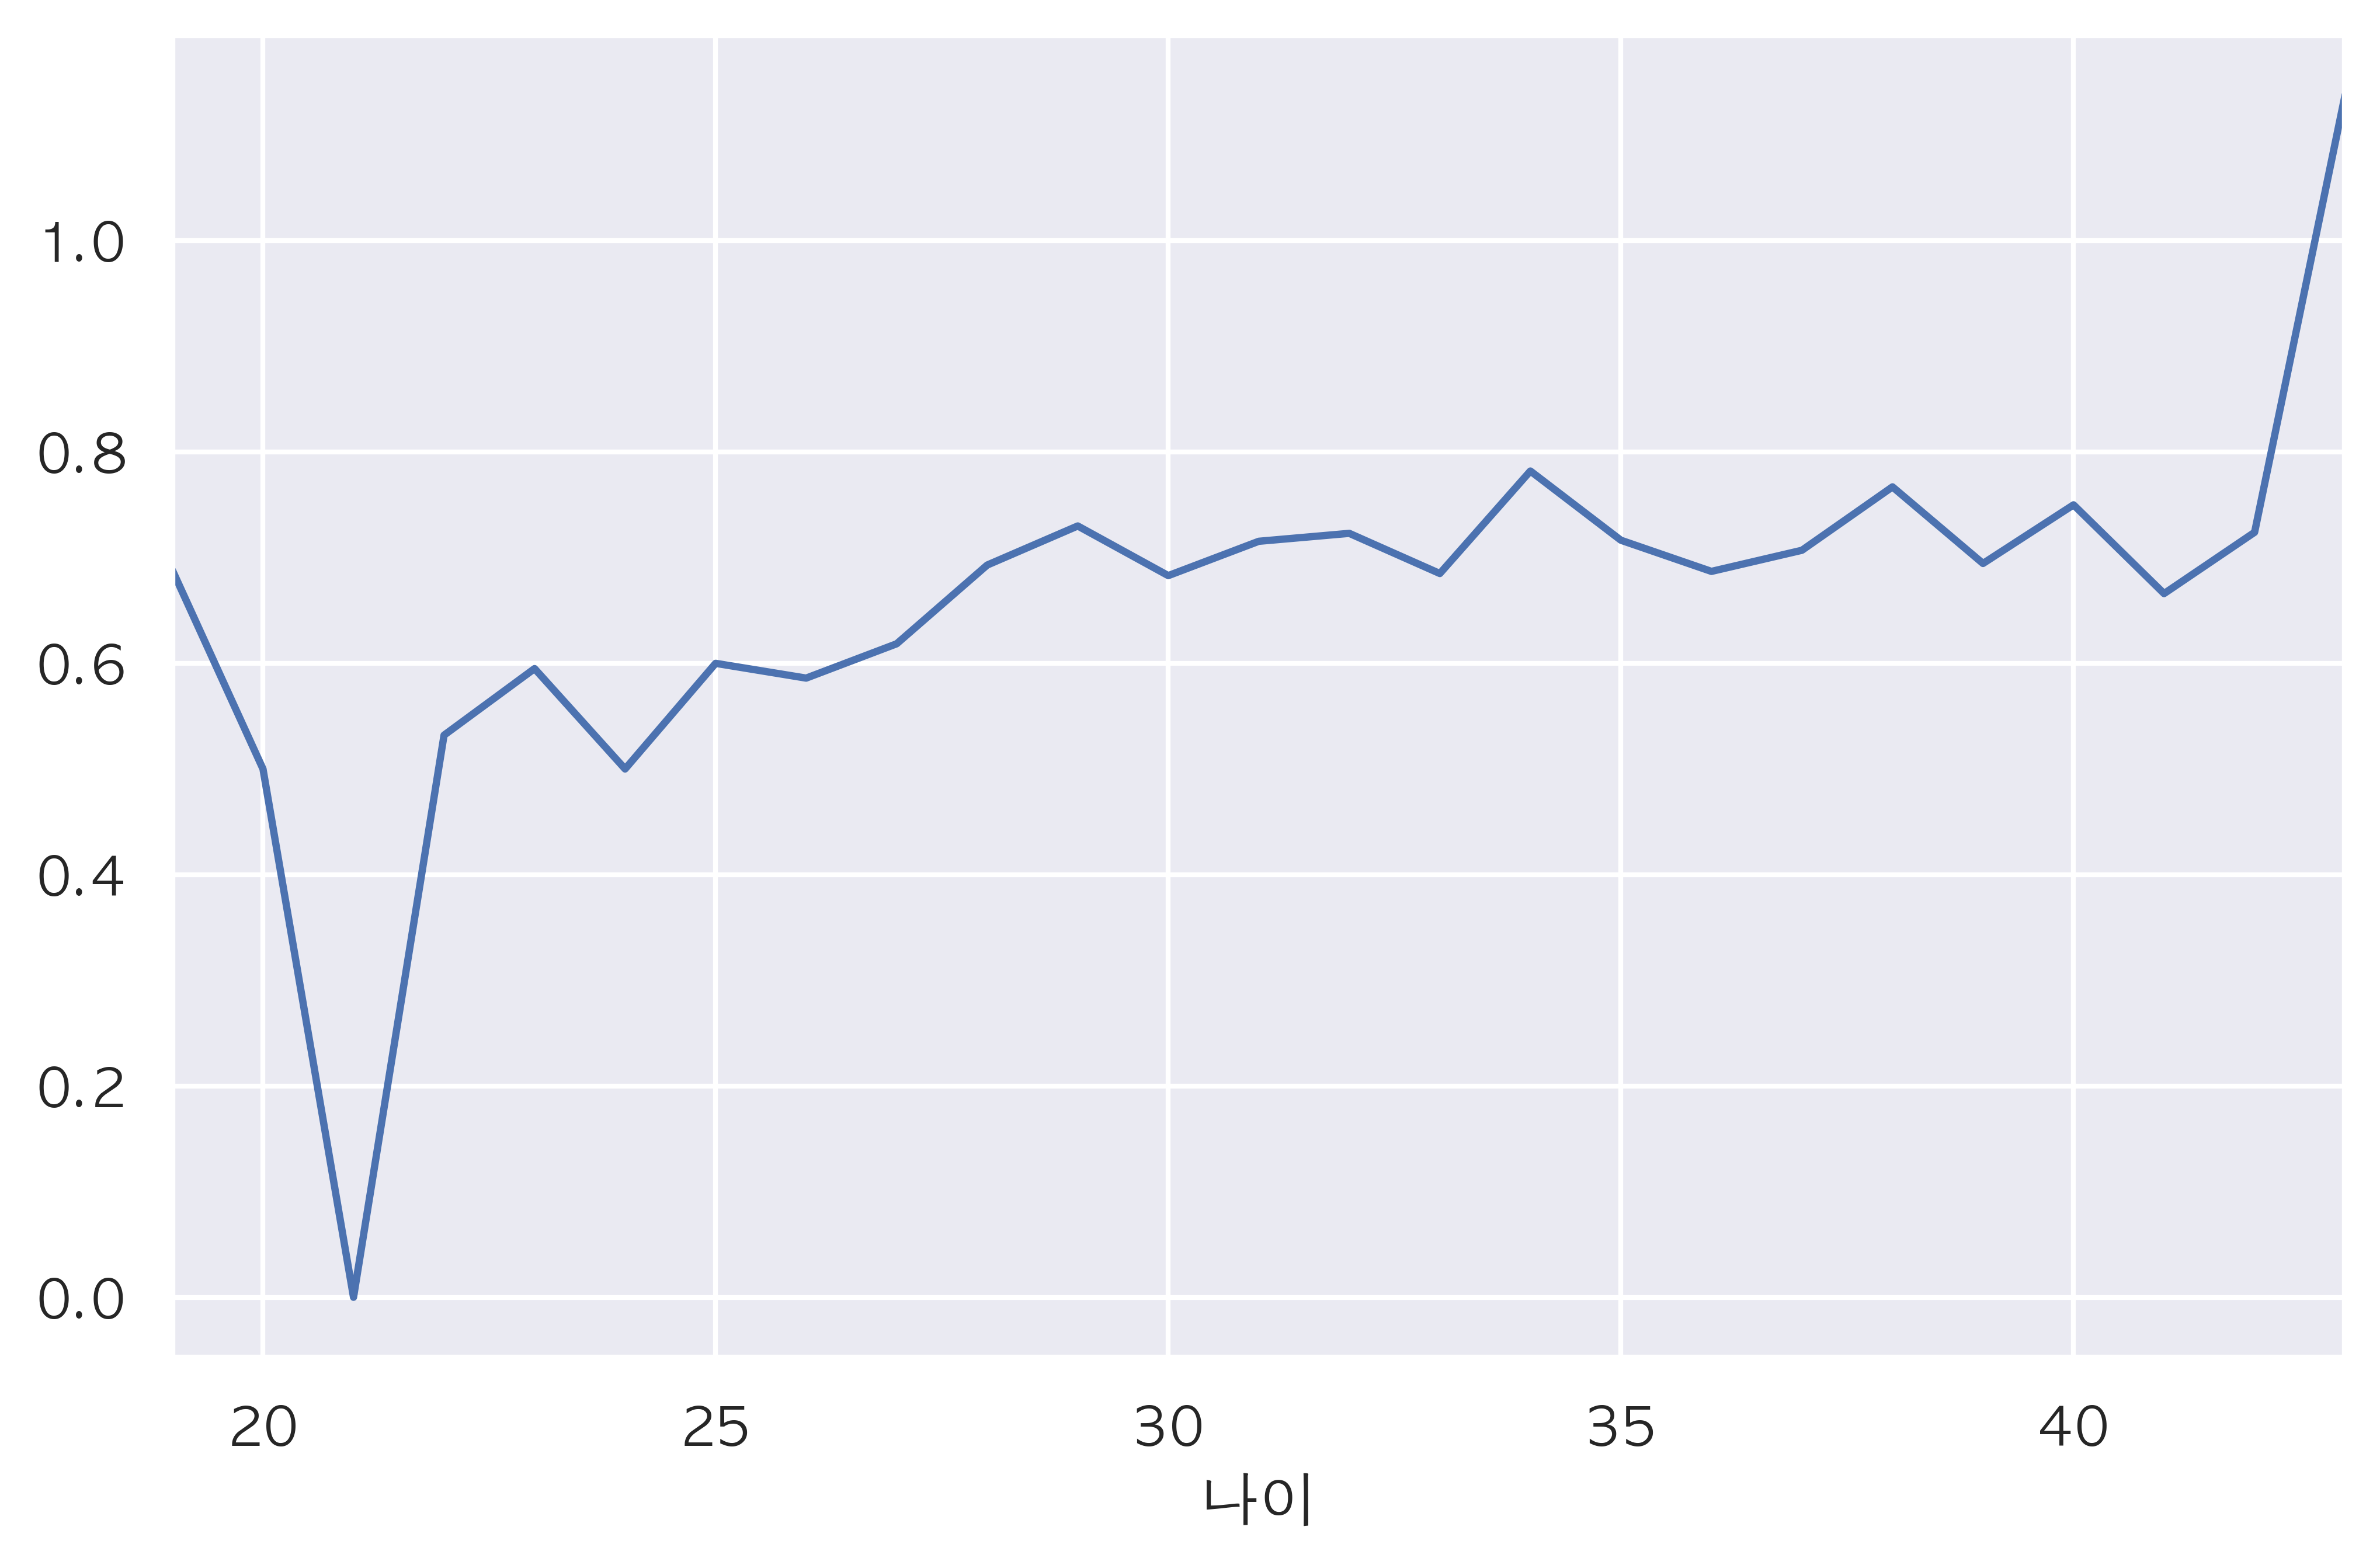

In [184]:
grouped = df['OPS'].groupby(df['나이'])
grouped.median().plot()

In [64]:
df[(df['출루']==1) | (df['장타']==1)]

Unnamed: 0   ID   이름          생일  팀    시즌    포지션  나이   G  타석  타수  득점  안타  \
322         322  178  류재원  1983-12-13  K  2011     LF  29  10  14  13   3   4   
388         388  192  강진성  1993-10-19  N  2013     3B  21   3   3   2   1   1   
391         391  127  류지혁  1994-01-13  두  2012     2B  19   2   1   1   0   1   
392         392  221  권정웅  1992-11-15  삼  2016      C  25   3   1   1   1   1   
393         393  222  조윤준  1989-08-30  L  2016      C  28   2   1   1   1   1   
394         394  223  이창진  1991-03-04  롯  2014     3B  24   4   2   2   1   1   
395         395  224  이창열  1991-09-06  한  2015  #REF!  25   5   2   2   0   1   
397         398  226  장태성  1986-12-15  K  2010     3B  25   3   1   1   0   1   
399         401  228  김주성  1998-01-30  L  2017     3B  20   2   1   1   1   1   
406         409   30  이병규  1974-10-25  L  2016  #REF!  43   1   1   1   0   1   

     2타  3타  홈런  루타  타점  도루  도실  볼넷  사구  고4  삼진  병살  희타  희비     타율     출루  \
322   1   1   2  13   7   0   0   1   0   0   5   0   0   0  0.308  0.357   
388   1   0   0   2   0   0   0   1   0   0   0   0   0   0  0.500  0.667   
391   0   0   0   1   0   0   0   0   0   0   0   0   0   0  1.000  1.000   
392   0   0   0   1   0   0   0   0   0   0   0   0   0   0  1.000  1.000   
393   0   0   0   1   0   0   0   0   0   0   0   0   0   0  1.000  1.000   
394   1   0   0   2   0   0   0   0   0   0   1   0   0   0  0.500  0.500   
395   1   0   0   2   1   0   0   0   0   0   0   0   0   0  0.500  0.500   
397   0   0   0   1   1   0   0   0   0   0   0   0   0   0  1.000  1.000   
399   0   0   0   1   0   0   0   0   0   0   0   0   0   0  1.000  1.000   
406   0   0   0   1   0   0   0   0   0   0   0   0   0   0  1.000  1.000   

      장타    OPS   wOBA    wRC   WAR    ISO  BBK count  
322  1.0  1.357  0.565  256.7  0.32  0.692  0.2  None  
388  1.0  1.667  0.687  335.8  0.10  0.500  inf  None  
391  1.0  2.000  0.955  543.3  0.06  0.000  NaN  None  
392  1.0  2.000  0.944  482.7  0.06  0.000  NaN  None  
393  1.0  2.000  0.944  475.4  0.05  0.000  NaN  None  
394  1.0  1.500  0.632  275.9  0.05  0.500  0.0  None  
395  1.0  1.500  0.636  286.4  0.05  0.500  NaN  None  
397  1.0  2.000  0.944  503.5  0.05  0.000  NaN  None  
399  1.0  2.000  0.927  486.1  0.05  0.000  NaN  None  
406  1.0  2.000  0.944  475.4  0.05  0.000  NaN  None

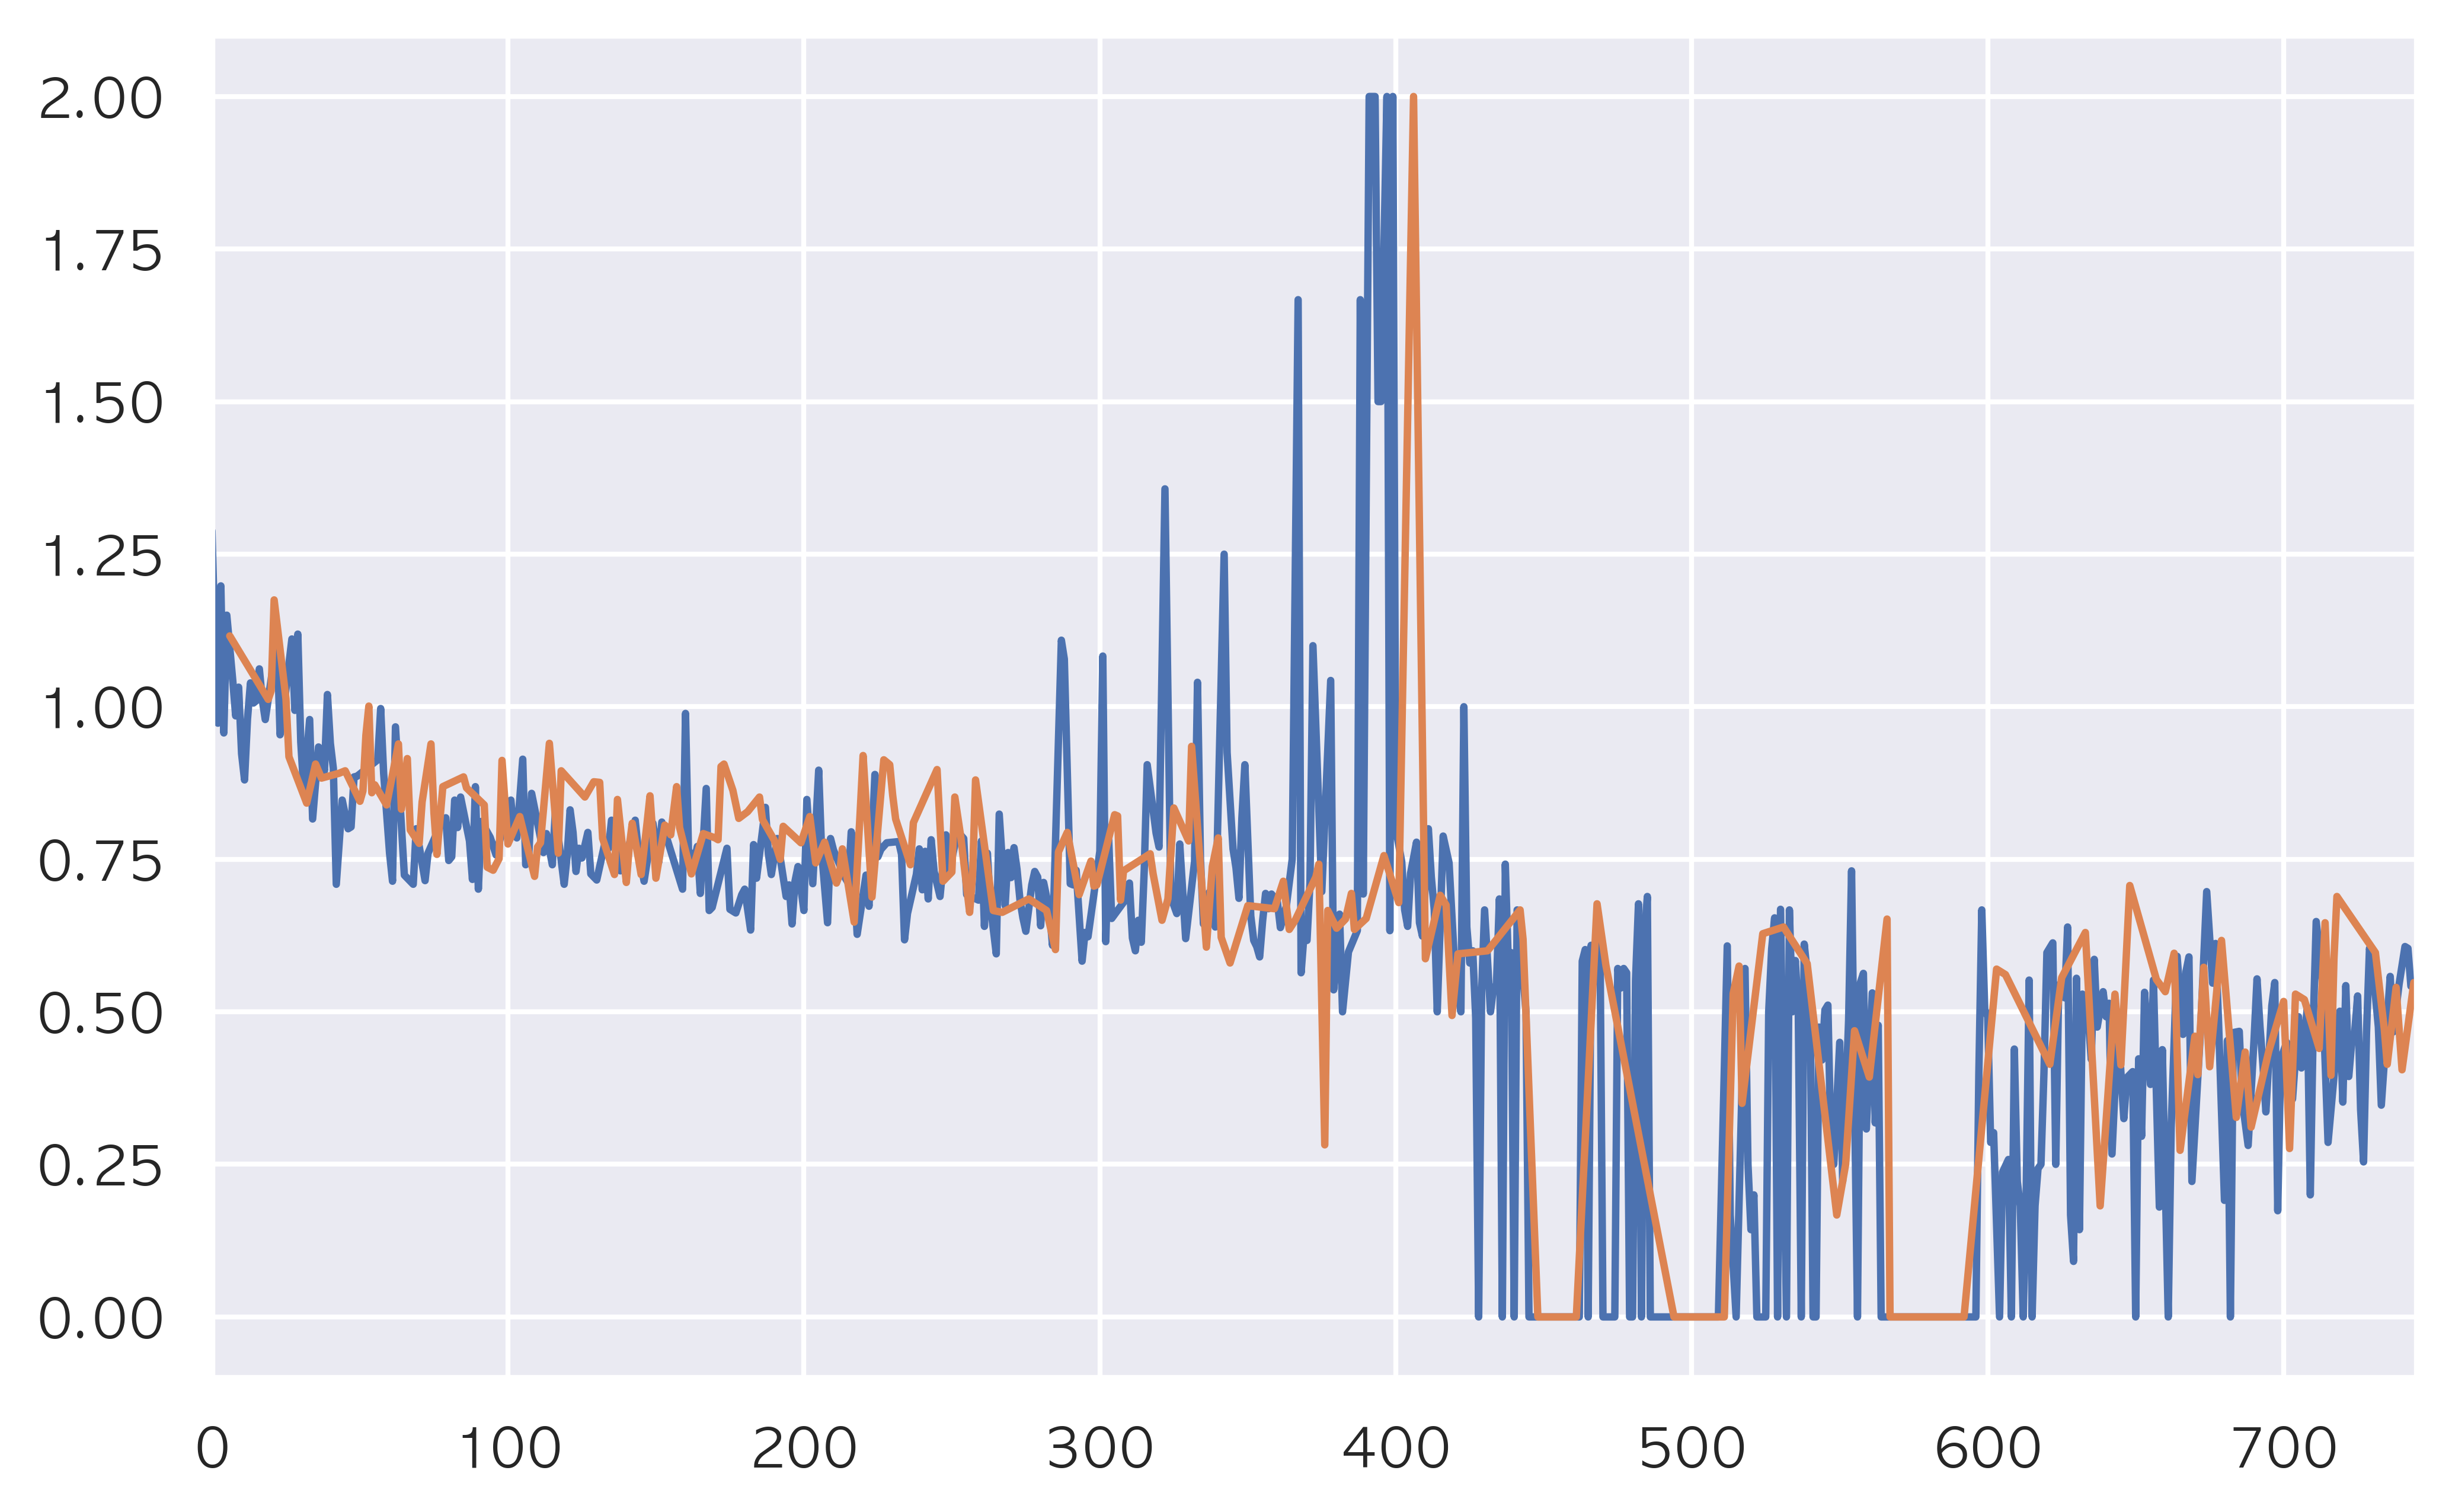

In [185]:
df1 = df[df['나이1'] == 0]['OPS']
df1.plot()
df2 = df[df['나이1'] == 1]['OPS']
df2.plot()

In [117]:
model = sm.OLS.from_formula(
    'OPS~ 포지션 + 시즌 + C(나이1) + 타점 + 도루 + 도실 + 사구 + 희타 + twoBLUCK +threeBLUCK + ISO', data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    OPS   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     35.86
Date:                Mon, 30 Mar 2020   Prob (F-statistic):           3.02e-90
Time:                        16:42:34   Log-Likelihood:                 39.959
No. Observations:                 725   AIC:                            -39.92
Df Residuals:                     705   BIC:                             51.80
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -6.0875      6.281     -0.969      

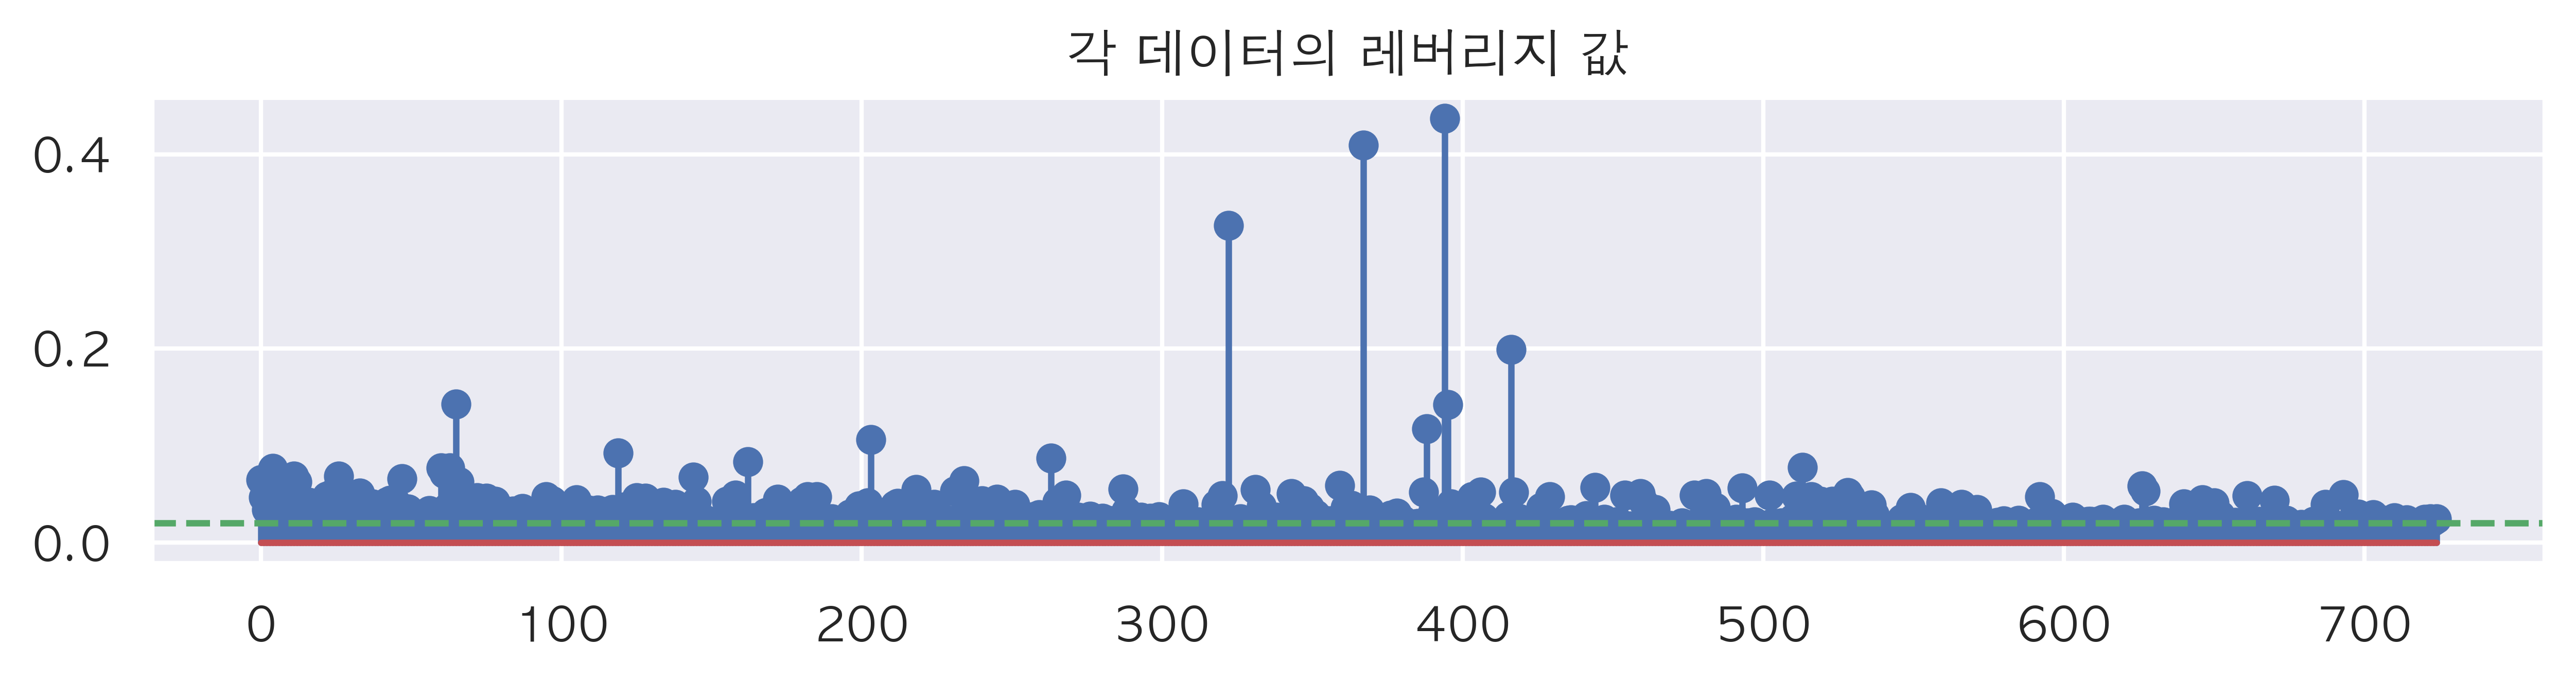

In [97]:
# 영향도 정보 객체
influence = result.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.axhline(0.02, c='g', ls='--')
plt.title('각 데이터의 레버리지 값')
plt.show()

In [98]:
hat.sum()

20.000000000000007

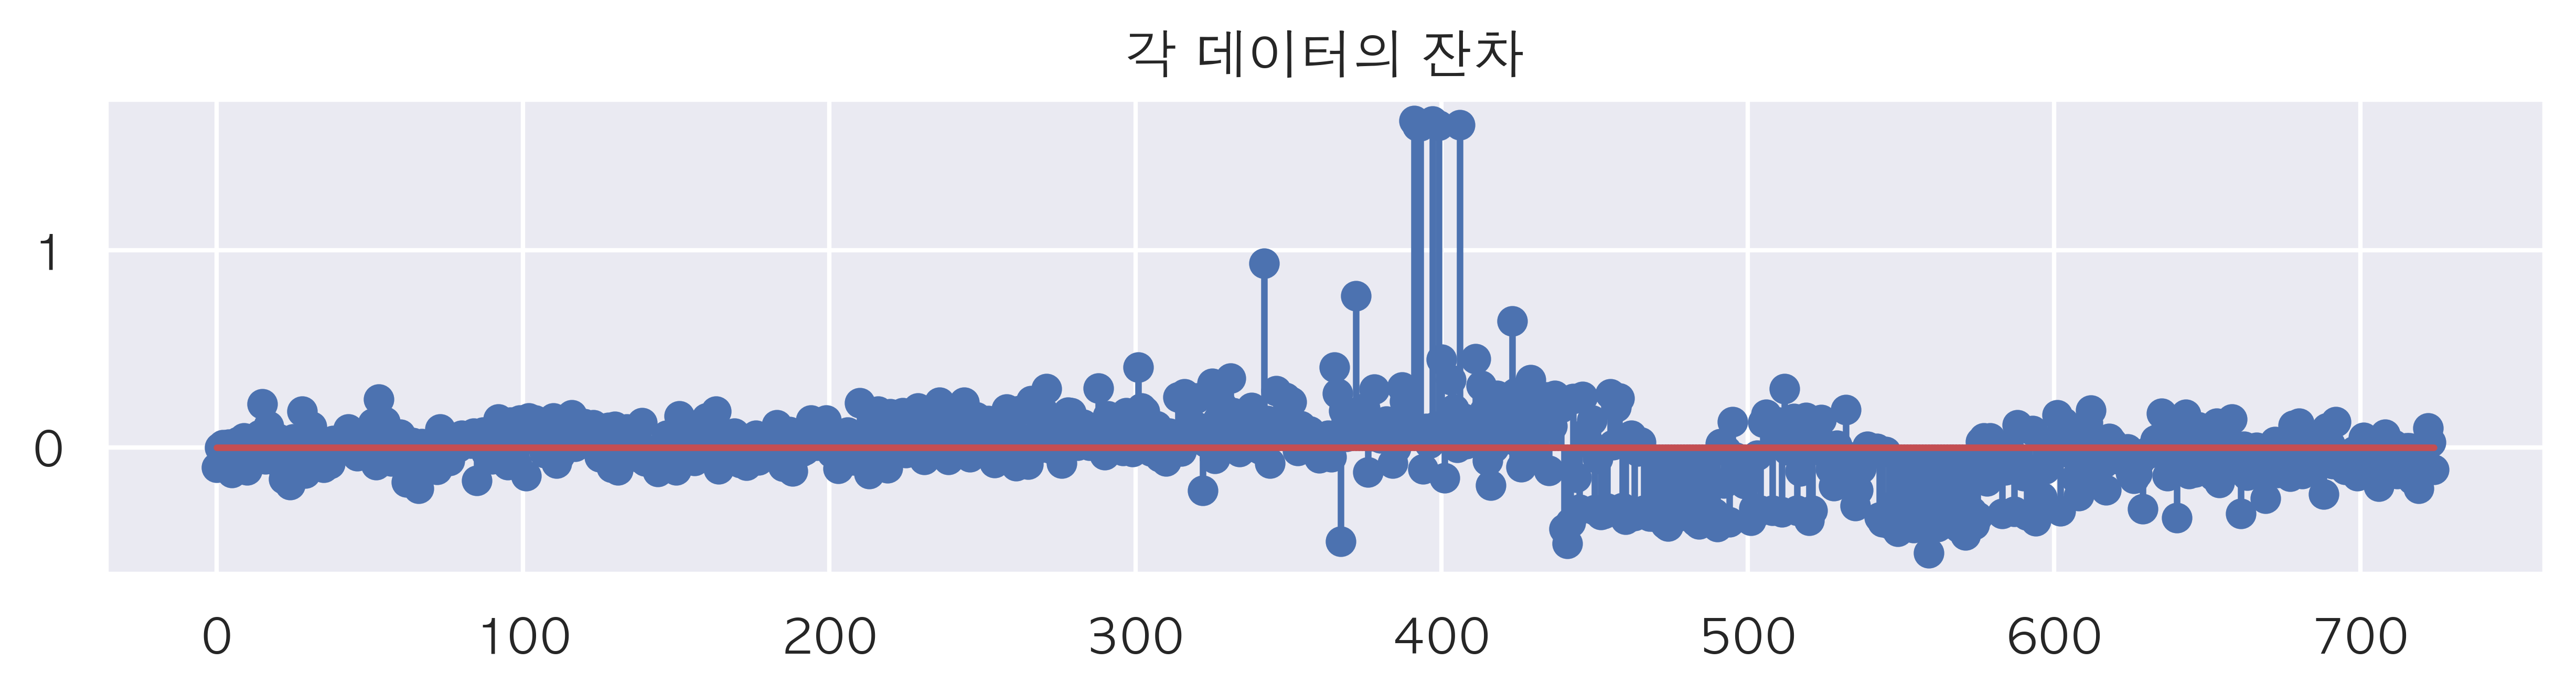

In [99]:
# 표준화 잔차 계산
plt.figure(figsize=(10, 2))
plt.stem(result.resid)
plt.title('각 데이터의 잔차')
plt.show()

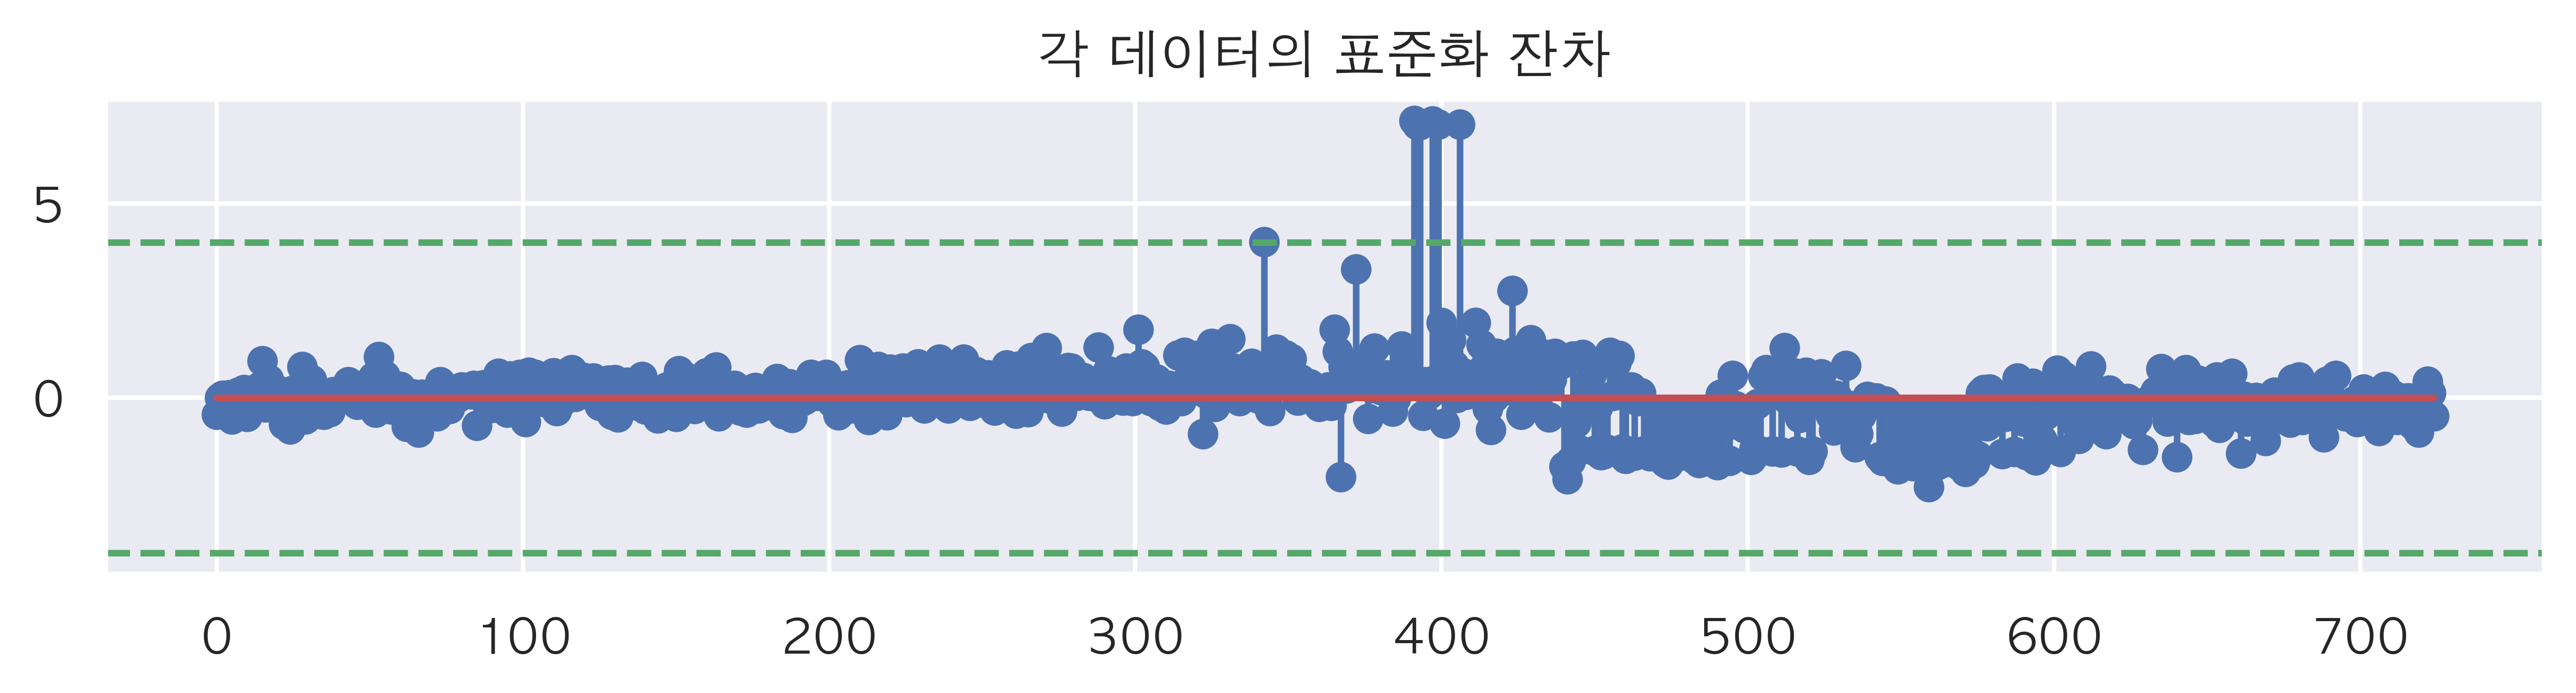

In [100]:
plt.figure(figsize=(10, 2))
plt.stem(result.resid_pearson)
plt.axhline(4, c='g', ls='--')
plt.axhline(-4, c='g', ls='--')
plt.title('각 데이터의 표준화 잔차')
plt.show()

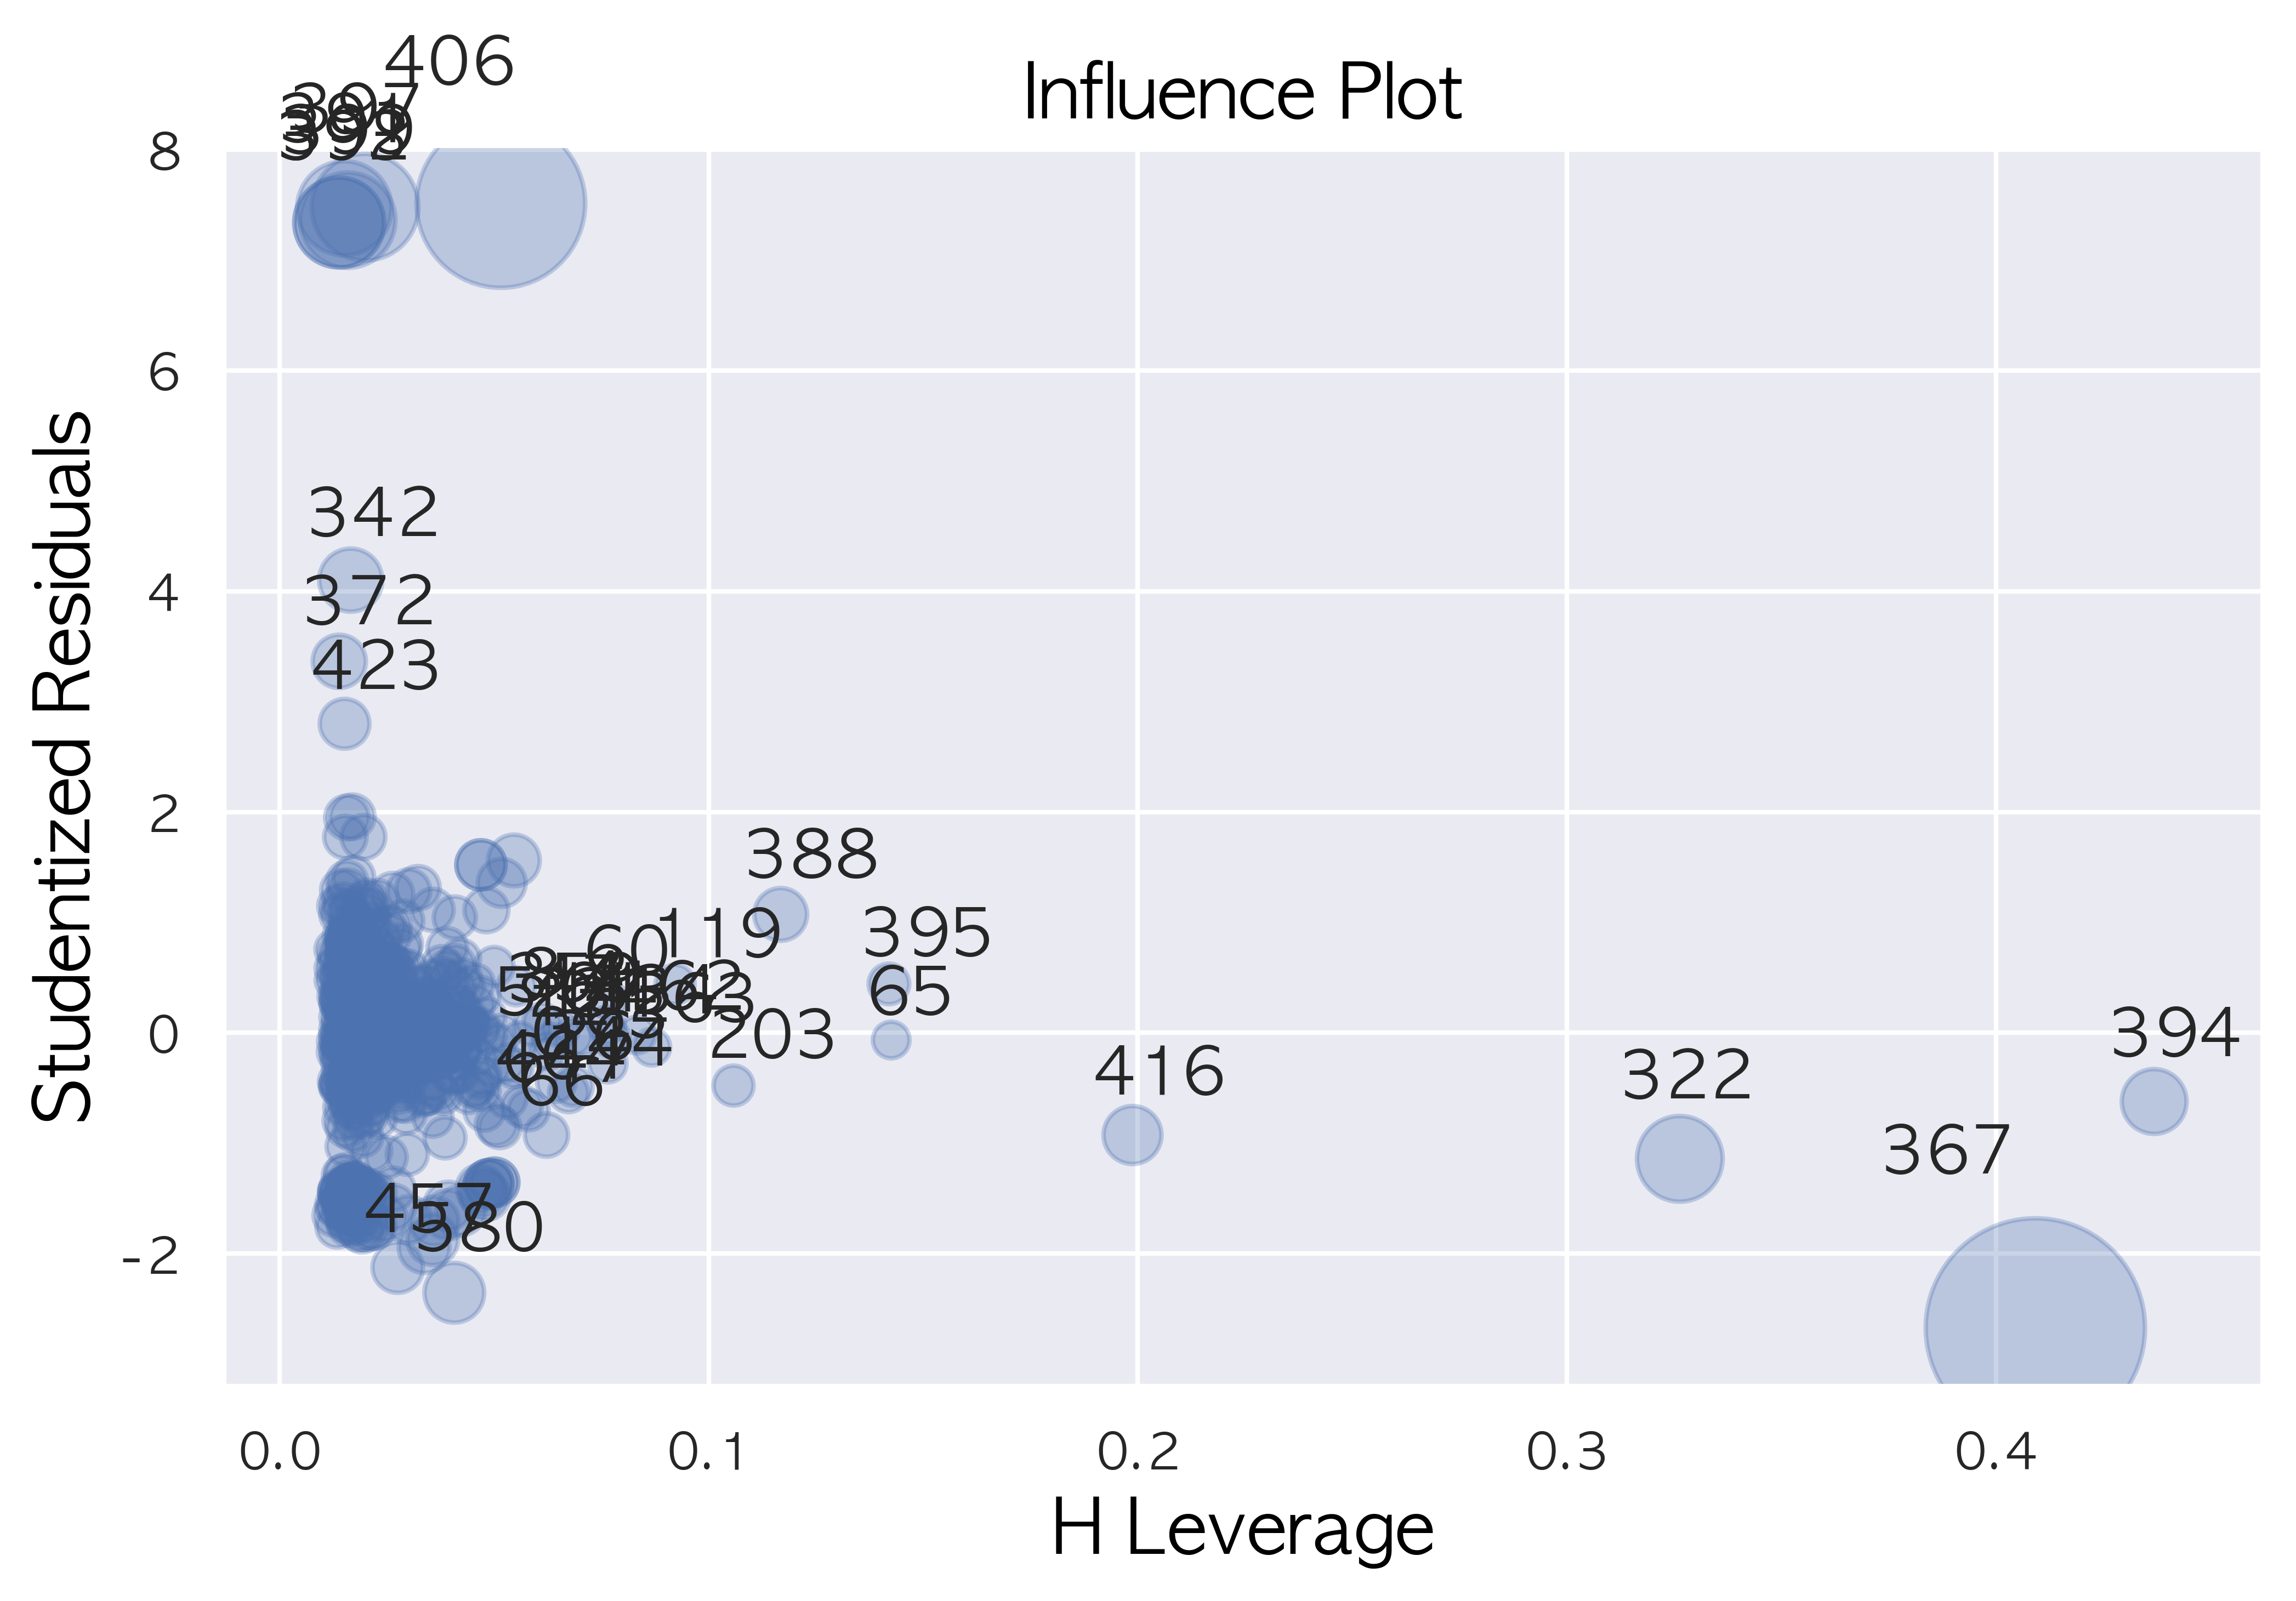

In [118]:
sm.graphics.influence_plot(result, plot_alpha=0.3)
plt.show()

In [108]:
# 아웃라이어 제거
cooks_d2, pvals = influence.cooks_distance
K = influence.k_vars
fox_cr = 4 / (len(df['OPS']) - K -1)
idx = np.where(cooks_d2 > fox_cr)[0]
idx2 = list(set(range(len(df))).difference(idx))
df1 = df.iloc[idx2, :].reset_index(drop=True)

In [110]:
model = sm.OLS.from_formula(
    'OPS~ 포지션 + 시즌 + C(나이1) + 타점 + 도루 + 도실 + 사구 + 희타 + twoBLUCK +threeBLUCK + ISO', data=df1)
result1 = model.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                    OPS   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     81.40
Date:                Mon, 30 Mar 2020   Prob (F-statistic):          3.93e-161
Time:                        16:40:59   Log-Likelihood:                 297.17
No. Observations:                 704   AIC:                            -554.3
Df Residuals:                     684   BIC:                            -463.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -9.1039      4.411     -2.064      

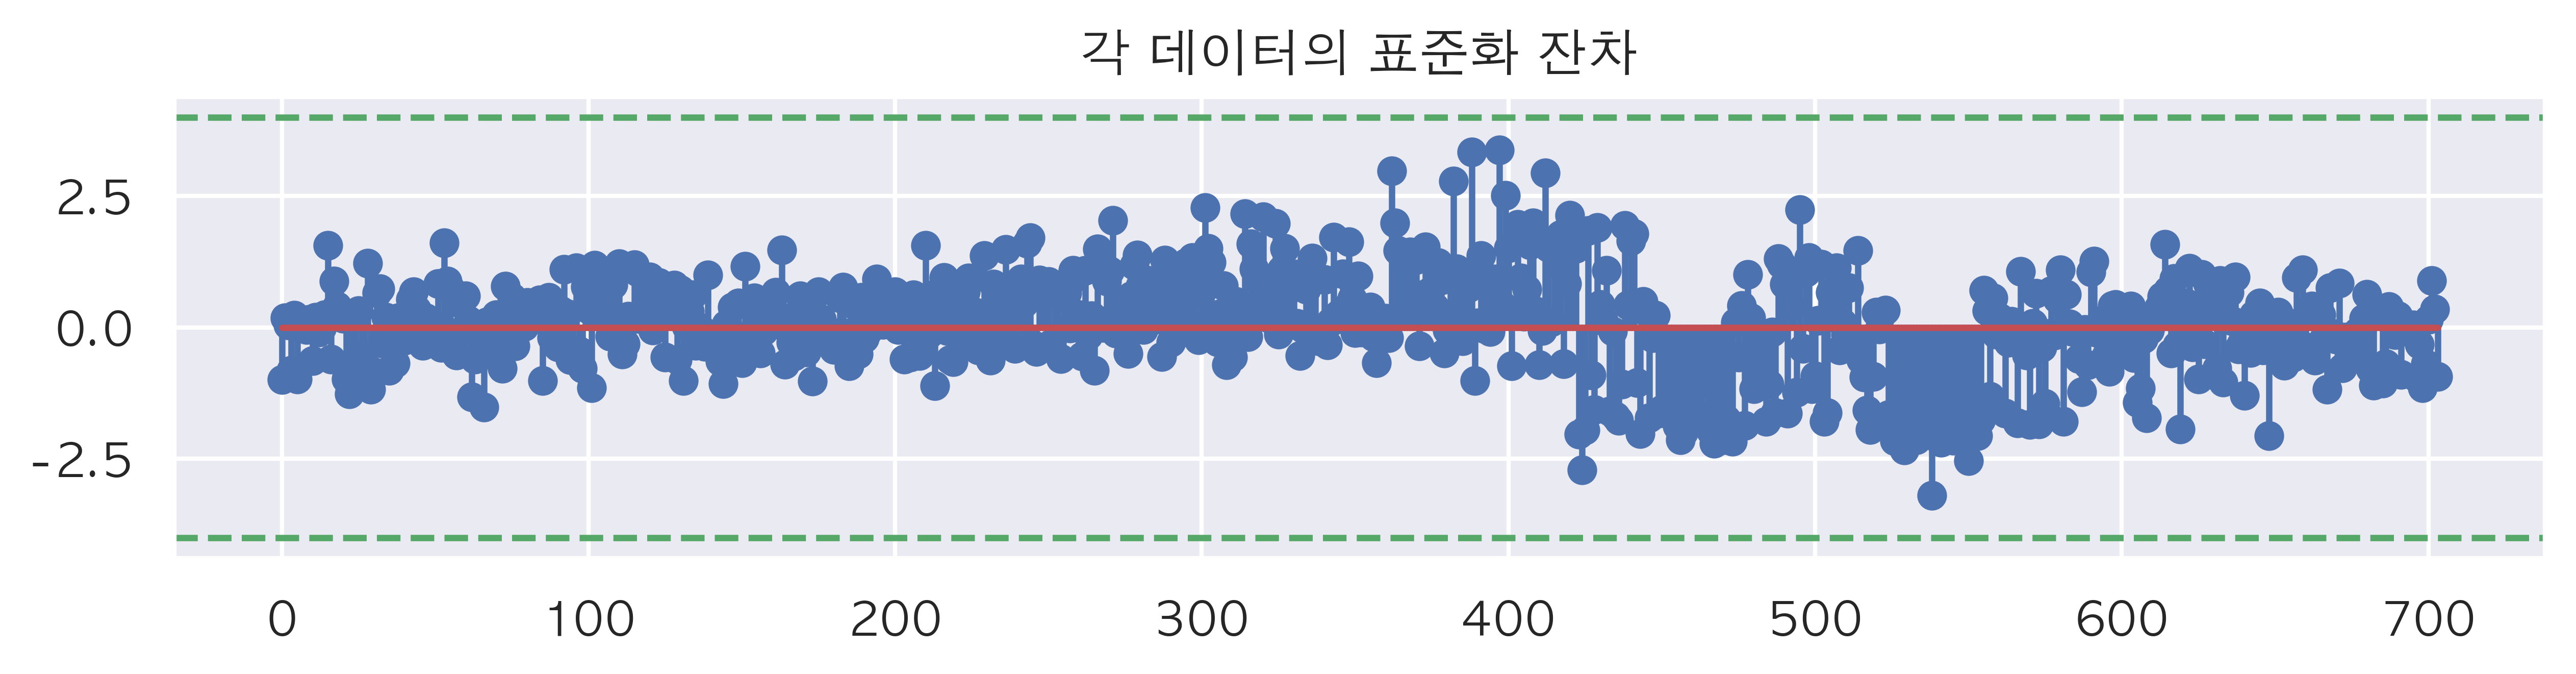

In [111]:
plt.figure(figsize=(10, 2))
plt.stem(result1.resid_pearson)
plt.axhline(4, c='g', ls='--')
plt.axhline(-4, c='g', ls='--')
plt.title('각 데이터의 표준화 잔차')
plt.show()